In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [7]:
train_dir = r"C:/Users/METEHAN/Desktop/Dosyalar/Python Kodları/API/Deep_Learning/train"
test_dir = r"C:/Users/METEHAN/Desktop/Dosyalar/Python Kodları/API/Deep_Learning/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim verisi yükleyici
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

# Test verisi yükleyici
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)


Found 1383 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # İlk Dropout katmanı

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # İkinci Dropout katmanı

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Üçüncü Dropout katmanı
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Final Dropout katmanı
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\METEHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,977 (7.05 MB)

 Trainable params: 1,846,977 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=19,
)

Epoch 1/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 376ms/step - accuracy: 0.6213 - loss: 0.6510
Epoch 2/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.6562 - loss: 0.6231  
Epoch 3/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 388ms/step - accuracy: 0.6332 - loss: 0.6384
Epoch 4/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.6562 - loss: 0.6392  
Epoch 5/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 363ms/step - accuracy: 0.6585 - loss: 0.6126
Epoch 6/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.7500 - loss: 0.5627  
Epoch 7/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 391ms/step - accuracy: 0.6615 - loss: 0.6047
Epoch 8/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.6562 - loss: 0.6046 
Epoch 9/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.6439 - loss: 0.6233
Epoch 10/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.8125 - loss: 0.4483  
Epoch 11/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 361ms/step - accuracy: 0.6190 - loss: 0.6158
Epoch 12/19
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s

In [36]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6643 - loss: 0.6347
Test accuracy: 0.6859375238418579


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Bu bir kedi!


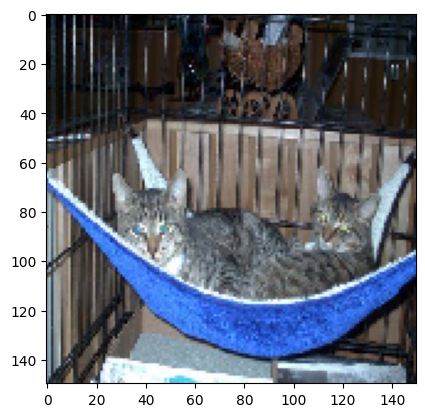

In [39]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    prediction = model.predict(img_array)
    

    if prediction[0][0] > 0.5: 
        print("Bu bir köpek!")
    else:
        print("Bu bir kedi!")
    
    
    plt.imshow(img)
    plt.show()

img_path = r'C:/Users/METEHAN/Desktop/Dosyalar/Python Kodları/API/Deep_Learning/test/cats/cat.4015.jpg'  # Buraya kendi görüntü dosyanın yolunu yaz
predict_image(img_path)


In [41]:
model.save('catdogmodel.h5')

In [42]:
# Done